In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
customer_df = pd.read_csv('../Data/olist_customers_dataset.csv')
order_df=pd.read_csv('../Data/olist_orders_dataset.csv')
review_df=pd.read_csv('../Data/olist_order_reviews_dataset.csv')
product_df=pd.read_csv('../Data/olist_products_dataset.csv')
order_item=pd.read_csv('../Data/olist_order_items_dataset.csv')
category_translation=pd.read_csv('../Data/product_category_name_translation.csv')

In [3]:
product_translated= pd.merge(product_df, category_translation, 
                     how='left', 
                     left_on='product_category_name', 
                     right_on='product_category_name')

In [4]:
product_translated_df = product_translated.drop(columns=['product_category_name'])

In [5]:
merged_data=order_df.merge(order_item, on = 'order_id')
merged_data=merged_data.merge(customer_df, on = 'customer_id')
retail_merged_df=merged_data.merge(review_df, on = 'order_id')
retail_merged_df=retail_merged_df.merge(product_translated_df, on = 'product_id')

## Data cleaning and exploration

In [6]:
retail_merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-08-19 00:00:00,2017-08-20 15:16:36,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-08-08 00:00:00,2017-08-08 23:26:23,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-11-08 00:00:00,2017-11-10 19:52:38,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08 00:00:00,2018-08-08 18:37:50,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery


In [7]:
retail_merged_df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112372.000000,112372.000000,112372.000000,112372.000000,112372.000000,110774.000000,110774.000000,110774.000000,112354.000000,112354.000000,112354.000000,112354.000000
mean,1.196010,120.378962,19.977752,35131.880691,4.032473,48.777583,786.793932,2.207124,2090.610882,30.152198,16.576811,23.001210
std,0.691243,182.152386,15.781421,29894.587573,1.387849,10.025179,651.609498,1.719787,3748.608093,16.139323,13.437792,11.707552
min,1.000000,0.850000,0.000000,1003.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.070000,11250.000000,4.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.250000,24320.000000,5.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,59063.000000,5.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,99990.000000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [8]:
retail_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   customer_id                    112372 non-null  object 
 2   order_status                   112372 non-null  object 
 3   order_purchase_timestamp       112372 non-null  object 
 4   order_approved_at              112357 non-null  object 
 5   order_delivered_carrier_date   111188 non-null  object 
 6   order_delivered_customer_date  110012 non-null  object 
 7   order_estimated_delivery_date  112372 non-null  object 
 8   order_item_id                  112372 non-null  int64  
 9   product_id                     112372 non-null  object 
 10  seller_id                      112372 non-null  object 
 11  shipping_limit_date            112372 non-null  object 
 12  price                         

#### Let's get rid of the unnecessary columns

In [9]:
retail_merged_df = retail_merged_df.drop(columns=['order_item_id', 'customer_id', 'order_approved_at', 'order_delivered_carrier_date', 'seller_id', 'shipping_limit_date', 'customer_zip_code_prefix',
                                                  'customer_state', 'review_id', 'review_comment_title', 'review_creation_date', 'review_answer_timestamp', 'product_description_lenght',
                                                  'product_name_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 
                                                  'product_width_cm'], axis=1)


In [10]:
(retail_merged_df.isnull().sum()/retail_merged_df.shape[0])*100

order_id                          0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_delivered_customer_date     2.100167
order_estimated_delivery_date     0.000000
product_id                        0.000000
price                             0.000000
freight_value                     0.000000
customer_unique_id                0.000000
customer_city                     0.000000
review_score                      0.000000
review_comment_message           57.603318
product_category_name_english     1.443420
dtype: float64

In [11]:
retail_merged_df.shape

(112372, 13)

#### Let's deal with the missing values of the columns we gonna use

As the order_delivered_customer_date and order_estimated_delivery_date near with each other let's replace the missing value of order_delivered_customer_date with the value of order_estimated_delivery_date and then drop the order_estimated_delivery_date column as it is unnecessary.

In [12]:
retail_merged_df['order_delivered_customer_date'] = retail_merged_df['order_delivered_customer_date'].fillna(retail_merged_df['order_estimated_delivery_date'])
retail_merged_df=retail_merged_df.drop(columns='order_estimated_delivery_date', axis = 1)

For a product_category_name_english we will use SimpleImputer as it is the strategy to replace missing values with the most frequent value, which is a common approach for categorical data.
This imputer is then applied to the categorical columns, effectively replacing missing values with the most common value in each respective column.

In [13]:
from sklearn.impute import SimpleImputer
imputerSimple = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed_data = imputerSimple.fit_transform(retail_merged_df[['product_category_name_english']])

retail_merged_df['product_category_name_english'] = imputed_data[:, 0]

As for review_comment_message, the missing values are most probably, where the customers didn't give any comment at all, but later in the NLP part we will deal also with the no comment

In [14]:
# Filling missing review comments with "No Comment and we will deal with the preprocessing steps later" 
retail_merged_df['review_comment_message'] = retail_merged_df['review_comment_message'].fillna("No Comment")

In [15]:
retail_merged_df.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
product_id                       0
price                            0
freight_value                    0
customer_unique_id               0
customer_city                    0
review_score                     0
review_comment_message           0
product_category_name_english    0
dtype: int64

Convert datetime columns again

In [16]:
datetime_columns = [
    'order_purchase_timestamp', 'order_delivered_customer_date']
for column in datetime_columns:
    retail_merged_df[column] = pd.to_datetime(retail_merged_df[column])

#### Treating outlier

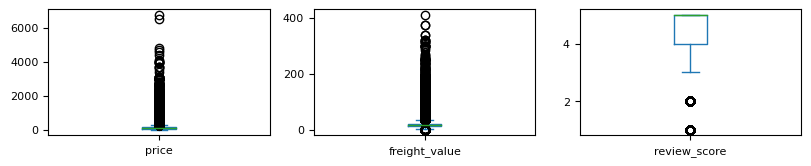

In [17]:
retail_merged_df.select_dtypes(include=["float64", "int64"]).plot(kind='box', subplots=True, figsize=(20,35), layout=(18,6), fontsize=8)
plt.title('Before treating outliers')
plt.show()

#### Replacing outliers with capping value at 97.5 percentile

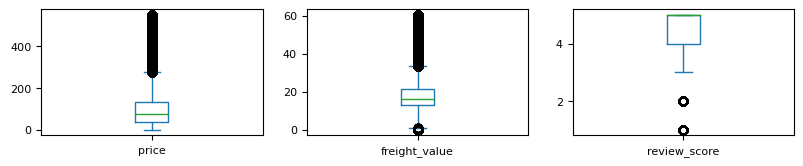

In [18]:
for col in retail_merged_df.select_dtypes(include=["float64", "int64"]).columns:
    q1_col = retail_merged_df[col].quantile(0.025)
    q3_col = retail_merged_df[col].quantile(0.975)
    retail_merged_df[col] = np.where((retail_merged_df[col] > q3_col), q3_col, retail_merged_df[col]) 
retail_merged_df.select_dtypes(include=["float64", "int64"]).plot(kind='box', subplots=True, figsize=(20,35), layout=(18,6), fontsize=8)
plt.title('After treating outliers')
plt.show()

#### Feature Engineering

In [19]:
retail_merged_df['delivery_time'] = (retail_merged_df['order_delivered_customer_date'] - retail_merged_df['order_purchase_timestamp']).dt.days
retail_merged_df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,product_id,price,freight_value,customer_unique_id,customer_city,review_score,review_comment_message,product_category_name_english,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,4.0,"Não testei o produto ainda, mas ele veio corre...",housewares,8
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,87285b34884572647811a353c7ac498a,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,4.0,Deveriam embalar melhor o produto. A caixa vei...,housewares,2
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,87285b34884572647811a353c7ac498a,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,sao paulo,5.0,"Só achei ela pequena pra seis xícaras ,mais é ...",housewares,5
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,2017-11-07 18:04:59,87285b34884572647811a353c7ac498a,29.99,14.10,e781fdcc107d13d865fc7698711cc572,florianopolis,3.0,No Comment,housewares,14
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,4.0,Muito bom o produto.,perfumery,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,0df37da38a30a713453b03053d60d3f7,356.00,18.12,fb9310710003399b031add3e55f34719,sao paulo,4.0,No Comment,sports_leisure,12
112368,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,2017-08-23 15:36:29,0df37da38a30a713453b03053d60d3f7,356.00,18.12,fb9310710003399b031add3e55f34719,sao paulo,4.0,No Comment,sports_leisure,12
112369,cfa78b997e329a5295b4ee6972c02979,delivered,2017-12-20 09:52:41,2018-01-26 15:45:14,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,a49e8e11e850592fe685ae3c64b40eca,campo do tenente,1.0,"Ele não é um mini cajon, é um shaker, ou seja,...",musical_instruments,37
112370,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,5.0,No Comment,health_beauty,8


### EDA

#### Distribution of numeric variables

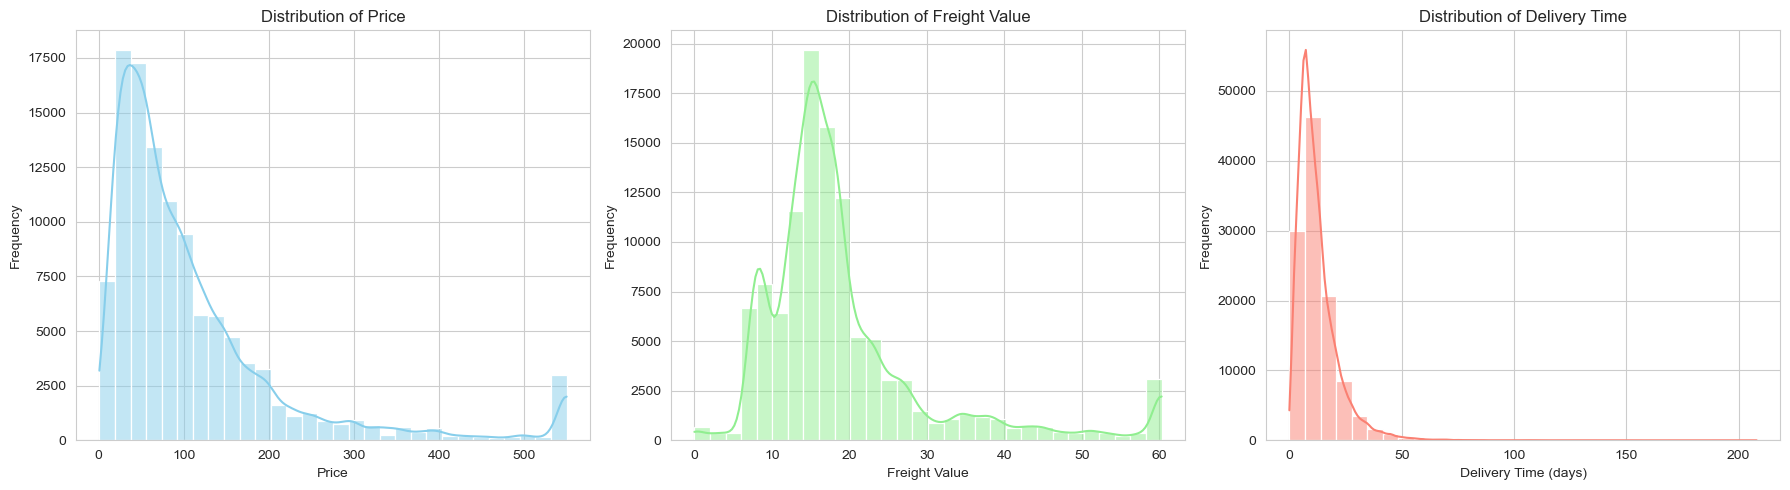

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot histograms for the numerical variables
sns.histplot(retail_merged_df['price'], bins=30, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(retail_merged_df['freight_value'], bins=30, ax=axes[1], kde=True, color='lightgreen')
axes[1].set_title('Distribution of Freight Value')
axes[1].set_xlabel('Freight Value')
axes[1].set_ylabel('Frequency')

sns.histplot(retail_merged_df['delivery_time'], bins=30, ax=axes[2], kde=True, color='salmon')
axes[2].set_title('Distribution of Delivery Time')
axes[2].set_xlabel('Delivery Time (days)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Price Distribution: The distribution of prices is right-skewed, indicating that most of the products have lower prices, with a few expensive outliers. This is common for e-commerce sites that offer a large selection of goods, ranging in price from extremely cheap to high-end goods.

Freight Value Distribution: Similar to the price distribution, the freight value is also right-skewed. This suggests that shipping costs are generally low for most orders, with fewer orders incurring high freight charges. 

Delivery Time Distribution: The delivery time shows a somewhat right-skewed distribution, indicating that most orders are delivered within a relatively short period, but there are also orders that take much longer to deliver.


#### Categorical Analysis

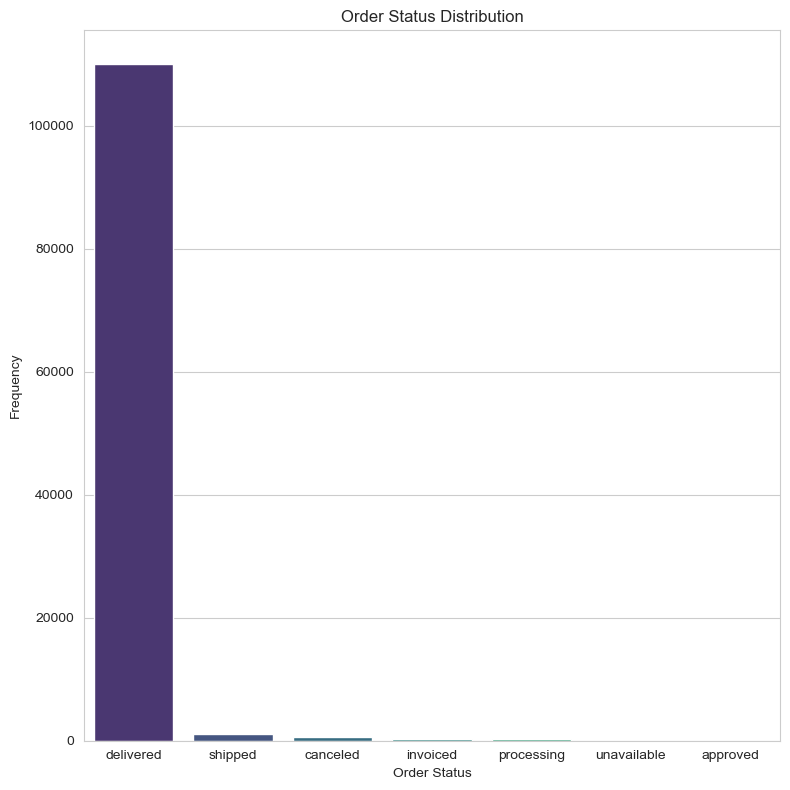

In [23]:
order_status_counts = retail_merged_df['order_status'].value_counts()
# Set the figure size directly with plt.figure
plt.figure(figsize=(8, 8))

# Order Status Distribution using seaborn
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="viridis")

# Set the title, xlabel, and ylabel with plt methods
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

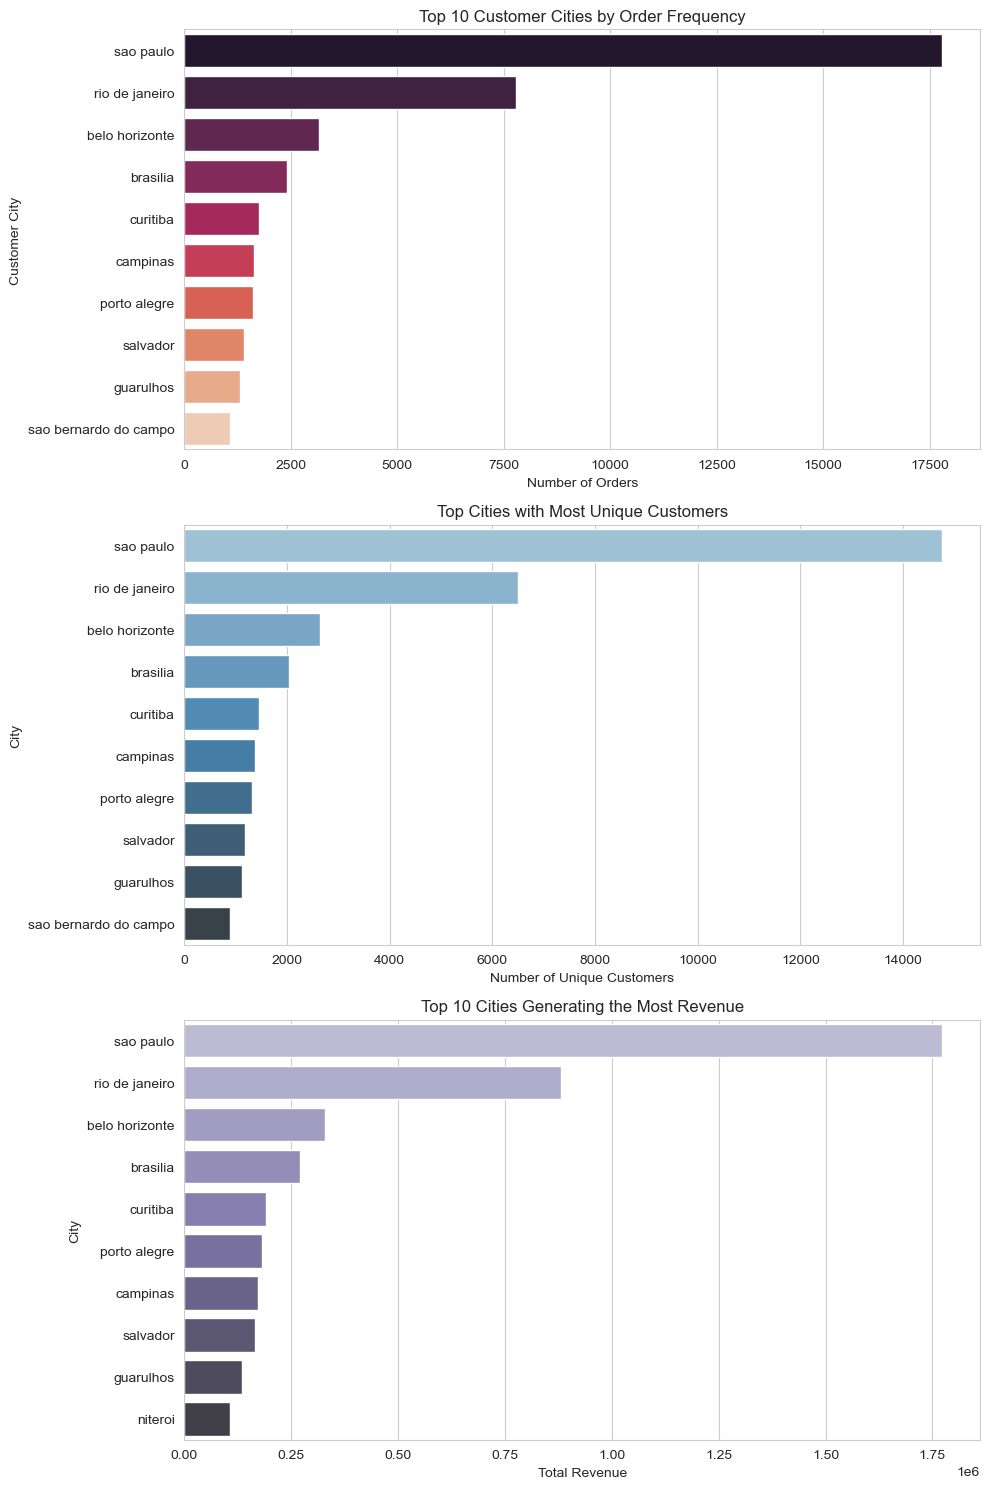

In [24]:
customer_city_counts = retail_merged_df['customer_city'].value_counts().head(10)  # Top 10 cities with most orders
unique_customers_per_city = retail_merged_df.groupby('customer_city').agg({'customer_unique_id': 'nunique'}).sort_values(by='customer_unique_id', ascending=False).head(10)# Top 10 cities with most orders
revenue_per_city = retail_merged_df.groupby('customer_city').agg({'price': 'sum'}).sort_values(by='price', ascending=False).head(10)


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Customer City Distribution (Top 10)
sns.barplot(x=customer_city_counts.values, y=customer_city_counts.index, ax=axes[0], palette="rocket")
axes[0].set_title('Top 10 Customer Cities by Order Frequency')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Customer City')


# Top Cities with a Lot of Customers
sns.barplot(x=unique_customers_per_city['customer_unique_id'], y=unique_customers_per_city.index, ax=axes[1], palette="Blues_d")
axes[1].set_title('Top Cities with Most Unique Customers')
axes[1].set_xlabel('Number of Unique Customers')
axes[1].set_ylabel('City')


# Cities Generating the Most Revenue (Top 10)
sns.barplot(x=revenue_per_city['price'], y=revenue_per_city.index, ax=axes[2], palette="Purples_d")
axes[2].set_title('Top 10 Cities Generating the Most Revenue')
axes[2].set_xlabel('Total Revenue')
axes[2].set_ylabel('City')


plt.tight_layout()
plt.show()

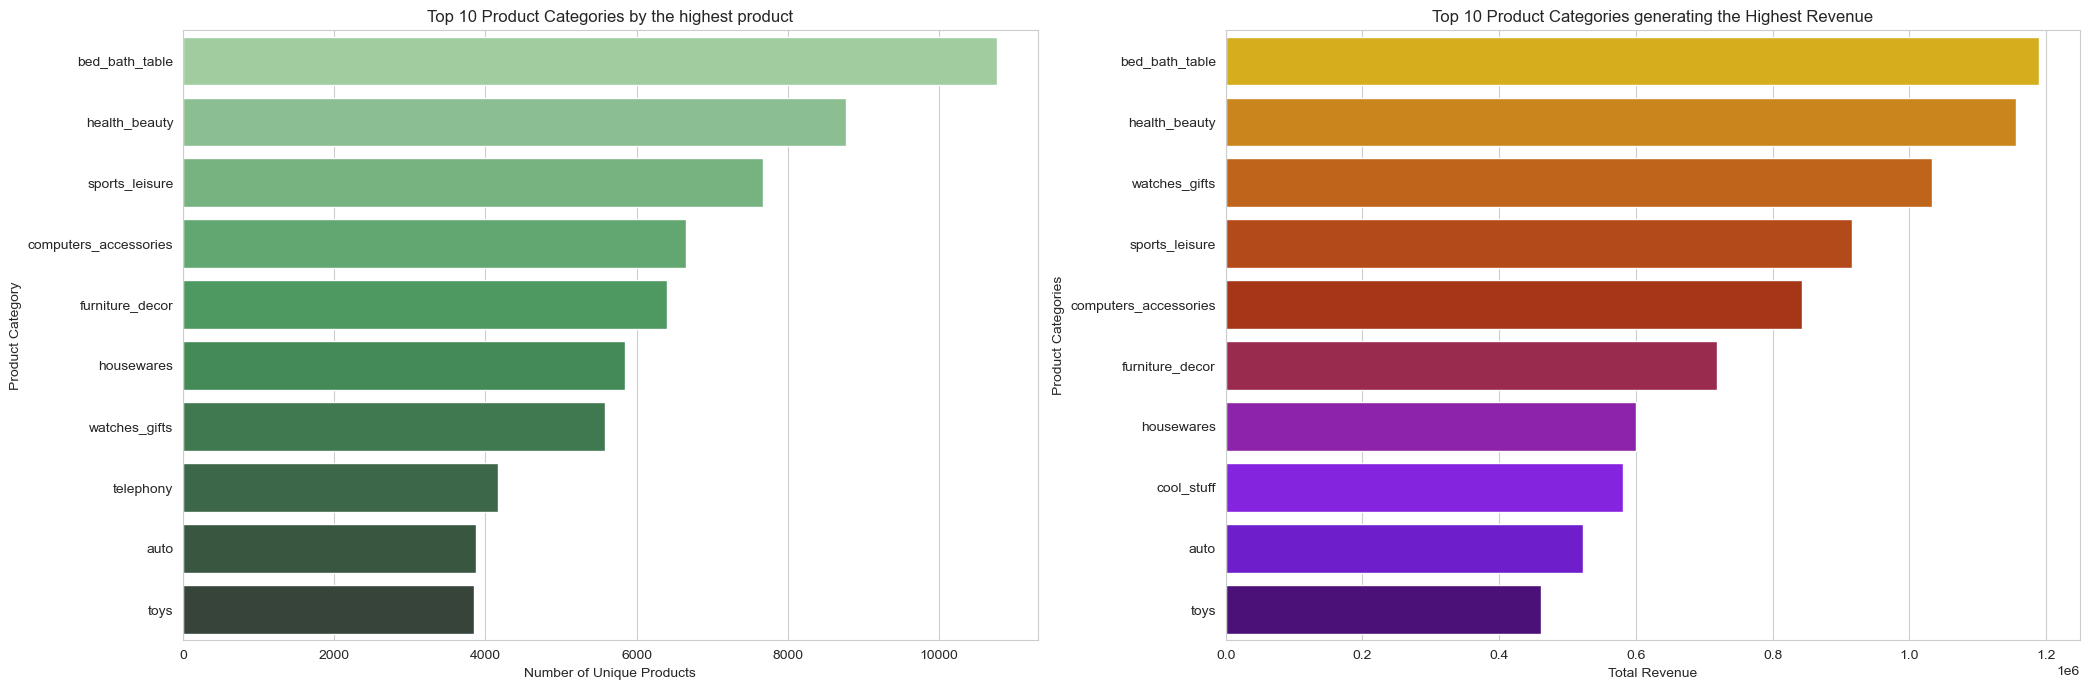

In [25]:
product_category_counts = retail_merged_df.groupby(retail_merged_df["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=False).head(10)
toprevenue_productcat = retail_merged_df.groupby(retail_merged_df["product_category_name_english"])["price"].sum().reset_index().sort_values("price", ascending = False).head(10)


# Set up the matplotlib figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))


# Number of Unique Products for Each Category (Top 10)
sns.barplot(x = "order_id", y = "product_category_name_english", data = product_category_counts, palette="Greens_d", ax=ax[0])
ax[0].set_xlabel('Number of Unique Products')
ax[0].set_ylabel('Product Category')
ax[0].set_title('Top 10 Product Categories by the highest product')


sns.barplot(x = "price", y = "product_category_name_english", data = toprevenue_productcat, palette = 'gnuplot_r', ax = ax[1])
ax[1].set_xlabel("Total Revenue")
ax[1].set_ylabel("Product Categories")
ax[1].set_title("Top 10 Product Categories generating the Highest Revenue")

plt.tight_layout()
plt.show()


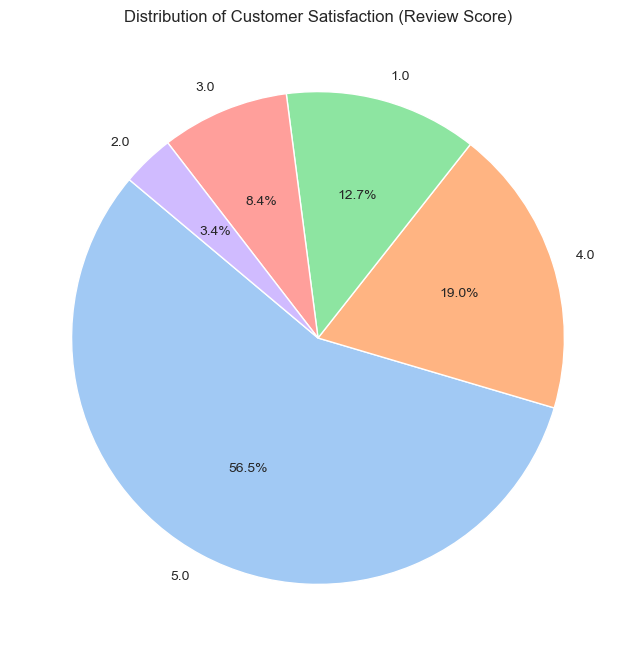

In [26]:
review_score_counts = retail_merged_df['review_score'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(review_score_counts, labels=review_score_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Customer Satisfaction (Review Score)')
plt.show()

#### Trend Analysis

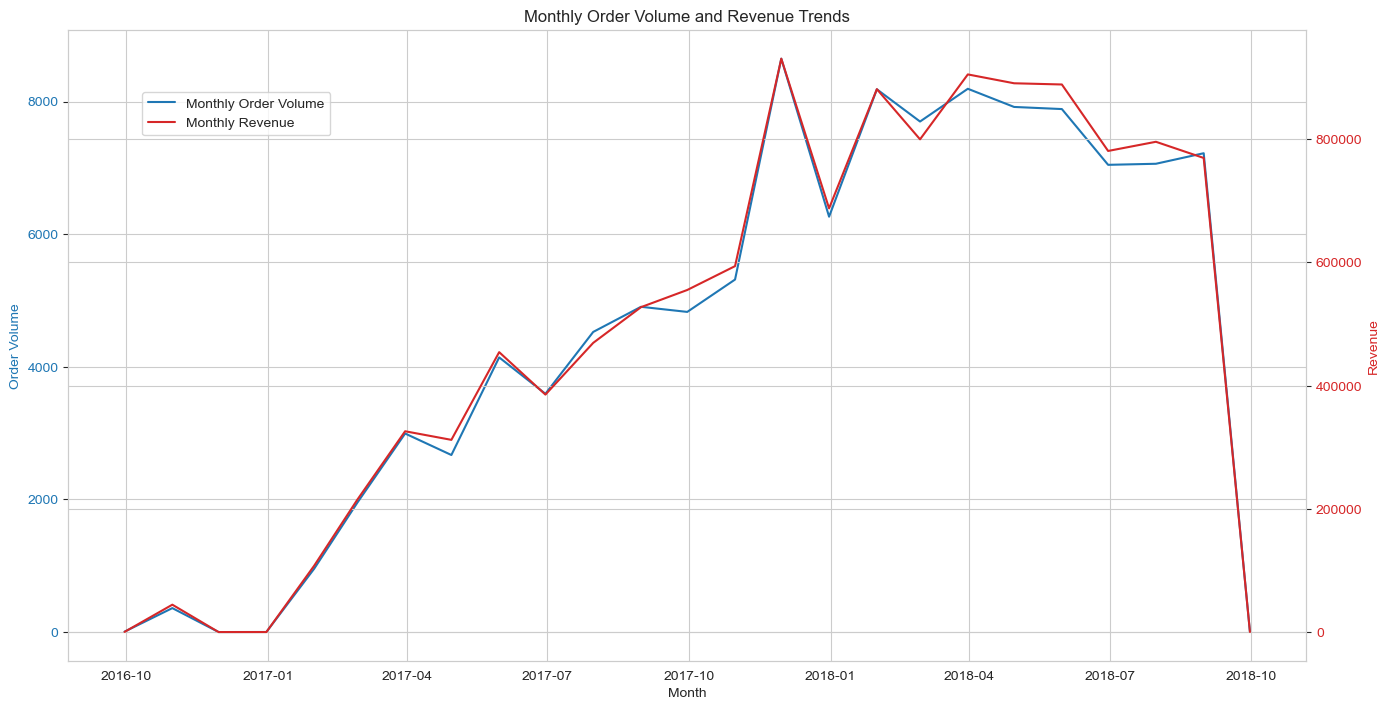

In [27]:
# Convert 'order_purchase_timestamp' to datetime format
retail_merged_df['order_purchase_timestamp'] = pd.to_datetime(retail_merged_df['order_purchase_timestamp'])

# Resample to get monthly order volume
monthly_order_volume = retail_merged_df.set_index('order_purchase_timestamp').resample('M').size()

# Resample to get monthly revenue
monthly_revenue = retail_merged_df.set_index('order_purchase_timestamp').resample('M')['price'].sum()

# Plotting the time series data
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Order Volume', color=color)
ax1.plot(monthly_order_volume.index, monthly_order_volume, color=color, label='Monthly Order Volume')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_revenue.index, monthly_revenue, color=color, label='Monthly Revenue')
ax2.tick_params(axis='y', labelcolor=color)

# Legend and title
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title('Monthly Order Volume and Revenue Trends')
plt.show()


Monthly Order Volume (Blue Line): This line represents the number of orders placed each month. You can observe any trends, seasonality, or significant changes in order volume over time. Peaks may indicate periods of high demand, possibly driven by holidays, sales events, or other factors.

Monthly Revenue (Red Line): The red line shows the total revenue generated each month. Similar to order volume, fluctuations in revenue can highlight periods of increased sales activity, potentially correlating with marketing campaigns, seasonal trends, or external economic factors.

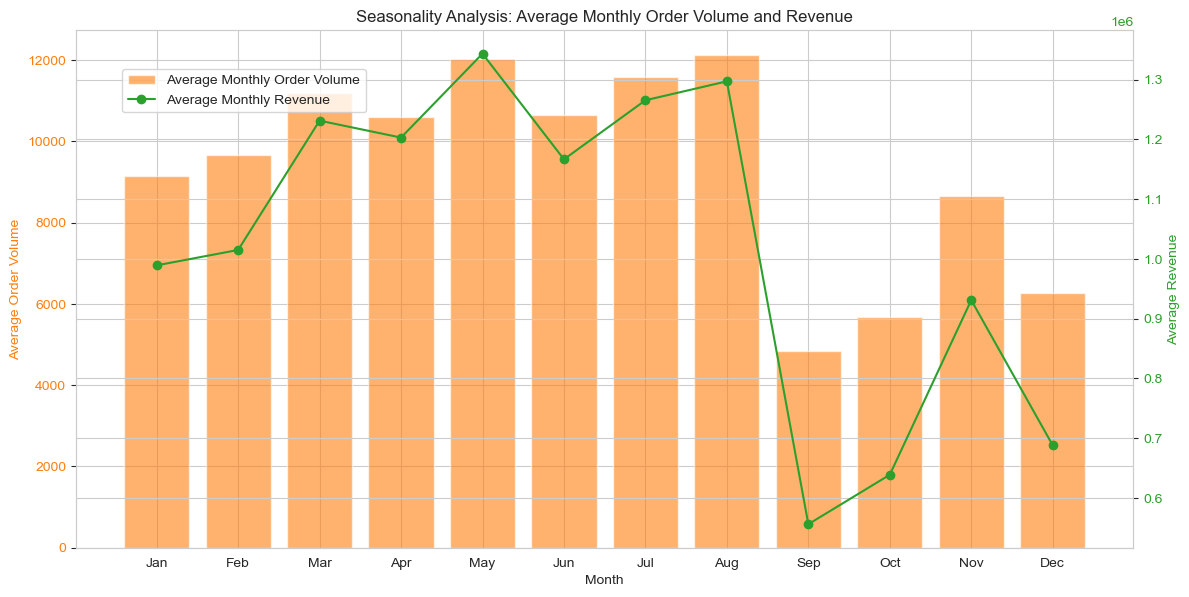

In [28]:
# Extracting month and year from order_purchase_timestamp for seasonality analysis
new_data=retail_merged_df
new_data['month'] = new_data['order_purchase_timestamp'].dt.month
new_data['year'] = new_data['order_purchase_timestamp'].dt.year

# Calculating average monthly order volume and revenue
monthly_seasonality_order_volume = retail_merged_df.groupby('month').size().mean()
monthly_seasonality_revenue = new_data.groupby('month')['price'].sum().mean()

# Grouping data for seasonality visualization
seasonality_order_volume = new_data.groupby('month').size()
seasonality_revenue = new_data.groupby('month')['price'].sum()

# Plotting seasonality data
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:orange'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Order Volume', color=color)
ax1.bar(seasonality_order_volume.index, seasonality_order_volume, color=color, alpha=0.6, label='Average Monthly Order Volume')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Average Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(seasonality_revenue.index, seasonality_revenue, color=color, marker='o', label='Average Monthly Revenue')
ax2.tick_params(axis='y', labelcolor=color)

# Legend and title
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title('Seasonality Analysis: Average Monthly Order Volume and Revenue')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Average Order Volume (Orange Bars): This represents the number of orders placed in each month. The chart may show certain months with higher order volumes, possibly due to seasonal buying patterns, holidays, or promotional events that traditionally drive more sales.

Average Revenue (Green Line): The green line with markers indicates the revenue generated in each month. Similar to the order volume, revenue peaks and troughs can provide insights into the effectiveness of sales strategies, seasonal demand, or external factors influencing purchasing behavior.

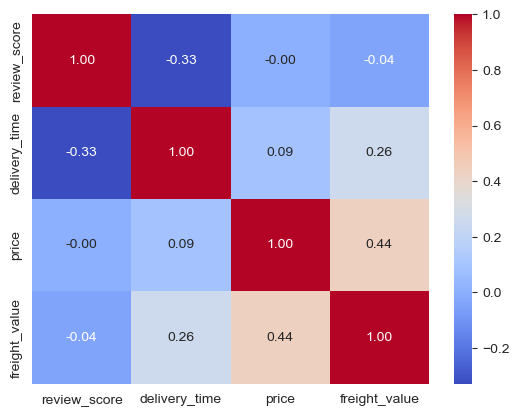

In [29]:
corr = retail_merged_df[['review_score', 'delivery_time', 'price', 'freight_value']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

This visualization shows how different numerical features correlate with each other. Key observations include:

A weak negative correlation between review_score and delivery_time, suggesting that longer delivery times might slightly impact customer satisfaction negatively and the other one is the price and freight_value have a positive correlation, indicating that higher-priced items might have higher shipping costs, which is expected.

In [20]:
%store retail_merged_df

Stored 'retail_merged_df' (DataFrame)
